# Diffusion

## Separation of variables method

We're going to solve the following problem:

$\quad$
\begin{equation*}
\frac{\partial \rho (x, t)}{\partial t} = D \frac{\partial ^ 2 \rho (x, t)}{\partial x ^ 2}
\end{equation*}

With the initial condition:

$\quad$
\begin{equation*}
\rho(x, 0) = \rho_0(x)
\end{equation*}

And also with these boundary conditions:

$\quad$
\begin{equation*}
\begin{cases}
\rho(L, t) = 0 \\
\rho(0, t) = 0
\end{cases}
\end{equation*}

Using the separation of variables method, the solution is given by the infinite series:

$\quad$
\begin{equation*}
\rho (x, t) = \sum _{n = 1} ^ {\infty} c_n \sin \left(\frac{n \pi}{L} x \right) e^ {- n ^ 2 \frac{\pi ^ 2}{L ^2} D t}
\end{equation*}

Where $ c_n $ is provided by the integral:

$\quad$
\begin{equation*}
c_n = \frac{2}{L} \int_0^L \rho_0(x) \sin\left(\frac{n \pi}{L} x\right) \, dx
\end{equation*}

In [1]:
# Importing libraries
import numpy as np
from scipy.integrate import quad, dblquad
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use("bmh") # Matplotlib styles
font_properties = FontProperties(weight= "bold") # To bold the text within the legend window

In [2]:
# Defining constants
L = 2.0
D = 0.1

In [3]:
# Defining rho_(x)
def rho_0(x):
    return np.where((x >= L / 2) & (x <= L), 1, 0)

In [4]:
x = np.linspace(0, L, 1000) # Space array
t = np.arange(0.2, 4.0, 0.2) # Time array

Text(0.5, 1.0, 'Initial Density Function')

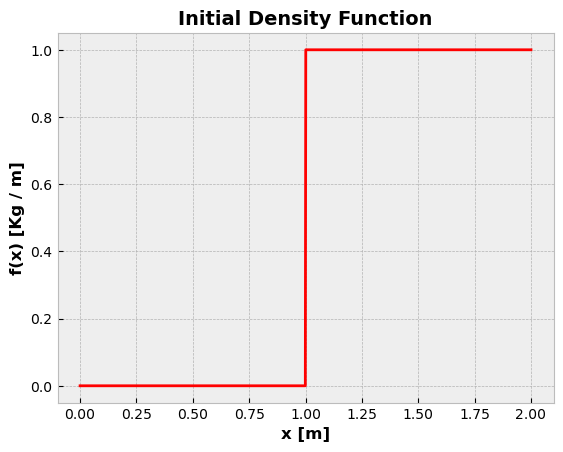

In [5]:
# Plotting rho_(x)
y = rho_0(x)

plt.plot(x, y, color= "red")
plt.xlabel("x [m]", fontsize= 12, fontweight= "bold")
plt.ylabel("f(x) [Kg / m]", fontsize= 12, fontweight= "bold")
plt.title("Initial Density Function", fontsize= 14, fontweight= "bold")

In [6]:
# Defining the solution
def rho(x, t):
    old_term = 0
    new_term = 0
    sum = 0
    tol = 1e-7

    integrand = lambda x, n: rho_0(x) * np.sin((np.pi * n * x) / L)
    c_n = lambda n: quad(integrand, 0, L, args= (n,))[0]

    for n in range(1, 100_000):
        new_term = c_n(n) * np.sin((np.pi * n * x) / L) * np.exp(- ((np.pi ** 2) * D * (n ** 2) * t ) / ( L ** 2))
        sum += new_term
        controller = np.max(np.abs(new_term - old_term))

        if controller < tol:
            break
        else:
            old_term = new_term
        
    sum = (2 / L) * sum
    
    return sum

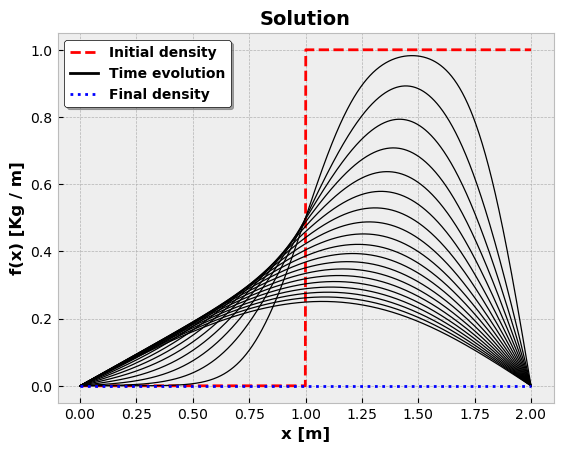

In [7]:
# Plotting the solution for different times
plt.plot(x, y, color= "red", linestyle= "--", label= "Initial density")
[plt.plot(x, rho(x, j), color= "black", linewidth= 0.9) for j in t]
plt.plot([], [], color= "black", label= "Time evolution")
plt.plot(x, np.zeros(len(x)), color= "blue", linestyle= ":", label= "Final density")
plt.title("Solution", fontsize= 14, fontweight= "bold")
plt.xlabel("x [m]", fontsize= 12, fontweight= "bold")
plt.ylabel("f(x) [Kg / m]", fontsize= 12, fontweight= "bold")
plt.legend(loc= "upper left", fontsize= 12, prop=font_properties,frameon= True, shadow= True, facecolor= "white", edgecolor= "black")
plt.show()

## Fourier transform

It’s possible to solve the same partial differential equation using the Fourier transform, but with different boundary conditions that are more general than the previous ones:

$\quad$
\begin{equation*}
\frac{\partial \rho (x, t)}{\partial t} = D \frac{\partial ^ 2 \rho (x, t)}{\partial x ^ 2}
\end{equation*}

Conditions:

$\quad$
\begin{equation*}
\rho(x, 0) = \rho_0(x)
\end{equation*}

$\quad$
\begin{equation*}
\rho (x, t) =
\begin{cases}
\rho (x, t) \quad if \quad 0 \leq x \leq L \\
0 \quad otherwise
\end{cases}
\end{equation*}

The solutions is given by:

$\quad$
\begin{equation*}
\rho (x, t) = \frac{1}{2 \pi} \int _{- \infty} ^{+ \infty} \tilde{\rho} (k) e^{- D k^2 t} e^{i k x} \, dk
\end{equation*}

Where:

$\quad$
\begin{equation*}
\tilde{\rho} (k) = \int _{0} ^{L} \rho_0 (x) e^ {-i k x} \, dx
\end{equation*}

Combining them togheter we get the unique solution:

$\quad$
\begin{equation*}
\rho (x, t) = \frac{1}{2 \pi} \int _ {- \infty} ^{+ \infty} dk \int _{0} ^{L} \rho _0 (x') e ^{i k (x - x')} e ^{- D k^2 t} \, dx'
\end{equation*}
$\quad$

Since $\rho (x, t)$ is indeed a real function, the imaginary part of the integral must be zero. Then we can simplify it:

$\quad$
\begin{equation*}
\rho (x, t) = \frac{1}{2 \pi} \int _ {- \infty} ^{+ \infty} dk \int _{0} ^{L} \rho _0 (x') e ^{- D k^2 t} \, \cos \left[k (x - x') \right] \, dx'
\end{equation*}

In [8]:
# Defining the solution
def solution(x, t):
    integrand = lambda k, x_prime, x, t: rho_0(x_prime) * np.exp(- D * t * (k ** 2)) * np.cos(k * (x - x_prime))
    return (1 / (2 * np.pi)) * dblquad(integrand, 0, L, lambda _: - np.inf, lambda _: np.inf, args = (x, t))[0]

solution = np.vectorize(solution)

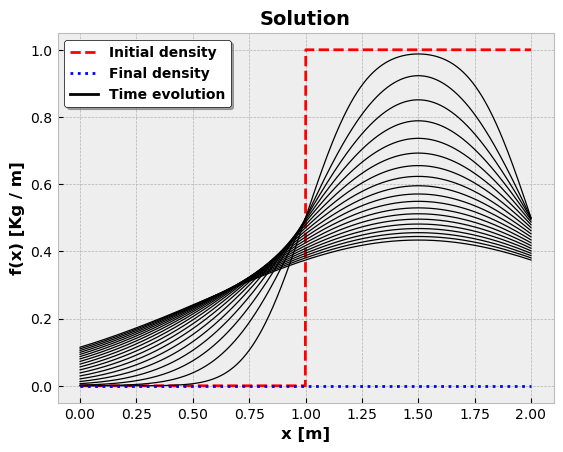

In [9]:
# Plotting the solution for different times
plt.plot(x, y, color = "red", linestyle = "--", label = "Initial density")
[plt.plot(x, solution(x, j), color = "black", linewidth = 0.9) for j in t]
plt.plot(x, solution(x, np.inf), color = "blue", linestyle = ":", label = "Final density")
plt.plot([], [], color = "black", label = "Time evolution")
plt.title("Solution", fontsize = 14, fontweight = "bold")
plt.xlabel("x [m]", fontsize = 12, fontweight = "bold")
plt.ylabel("f(x) [Kg / m]", fontsize = 12, fontweight= "bold")
plt.legend(loc= "upper left", fontsize = 12, prop=font_properties, frameon = True, shadow = True, facecolor = "white", edgecolor = "black")